In [1]:
import os,sys
root_dir=os.path.abspath(os.path.join(os.getcwd(),'..'))
sys.path.append(root_dir)

import torch
from torch import nn
from torch import optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader

from models.utils.discriminativ_loss import combined_loss
from models.FCN import ResNet,BasicBlock
from data.FER2013 import FER2013
from data.CK_plus import CK_plus
from data.utils import merger,augmentations

from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
from torchvision import transforms as tf

In [2]:
# load model
model=ResNet(BasicBlock,[2,2,2,2],7)
model=torch.load(f"{root_dir}/training/trained_models/fcn/06_01__00_45_42/model/model.pth")
model=model.cuda()

torch.Size([1, 64, 64])


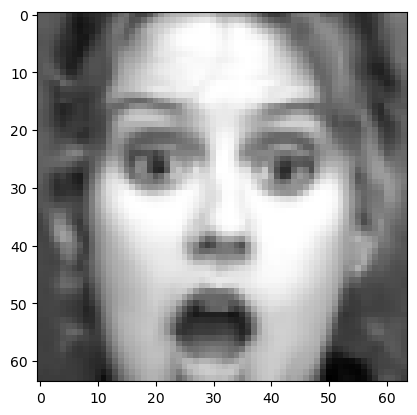

In [5]:
# using ckplus dataset
transform=tf.Compose([
    tf.Resize((64,64)),
    tf.Grayscale(),
    tf.ToTensor()
])
ds=CK_plus(transform=transform,split='test')

img=ds[4][0]
print(img.shape)
endimg,features,output=model(img.unsqueeze(0).cuda())
plt.imshow(img[0].numpy(),cmap='gray')


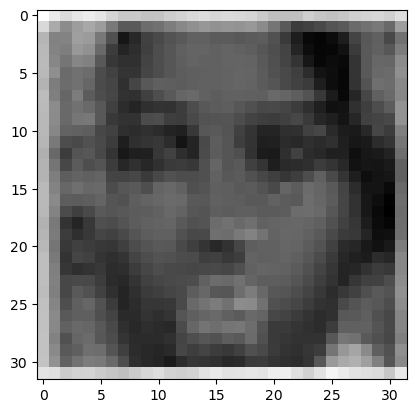

In [6]:
endimg.shape
plt.imshow(endimg.detach().cpu().numpy().squeeze().mean(axis=0),cmap='gray')